In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "Pymaceuticals/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_data_complete = pd.merge(trial_data, drug_data, how = "left", on = ["Mouse ID"])

# Display the data table for preview
drug_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [88]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drug_data = drug_data_complete.groupby(["Drug", "Timepoint"])
grouped_means = grouped_drug_data.mean()
# Convert to DataFrame
mean_tumorv_df = grouped_means.drop(columns = ["Metastatic Sites"])
# Preview DataFrame
mean_tumorv_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [89]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_sem = grouped_drug_data.sem()
sem_tumorv_df = grouped_sem.drop(columns = ["Mouse ID", "Metastatic Sites"])
# Convert to DataFrame
sem_tumorv_df2 = sem_tumorv_df.pivot_table("Tumor Volume (mm3)", "Timepoint", "Drug")
# Preview DataFrame
sem_tumorv_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [90]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumorv_df2 = mean_tumorv_df.pivot_table("Tumor Volume (mm3)", "Timepoint", "Drug")
# Preview that Reformatting worked
mean_tumorv_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


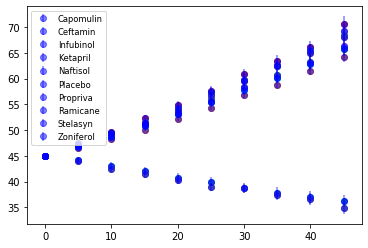

In [114]:
# Generate the Plot (with Error Bars)
time = mean_tumorv_df2.index
drugs = mean_tumorv_df2.columns

fig, ax = plt.subplots()
for i in drugs:
    spec_drug_data = mean_tumorv_df2.loc[:,i]
    error = sem_tumorv_df2.loc[:,i]    
    plt.scatter(time, spec_drug_data)
    ax.errorbar(time, spec_drug_data, yerr = error, 
                fmt="o", color="b", alpha=0.5, label = i)

    plt.legend(loc="upper left", fontsize="small", fancybox=True)

#Save the Figure
plt.show()

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
mean_met_df = grouped_means.drop(columns = ["Tumor Volume (mm3)"])

# Convert to DataFrame

# Preview DataFrame
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_mets_df = grouped_sem.drop(columns = ["Mouse ID", "Tumor Volume (mm3)"])
# Convert to DataFrame
type(sem_mets_df)
# Preview DataFrame
sem_mets_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [40]:
# Minor Data Munging to Re-Format the Data Frames
mean_mets_df2 = mean_mets_df.pivot_table("Metastatic Sites", "Timepoint", "Drug")
# Preview that Reformatting worked
mean_mets_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


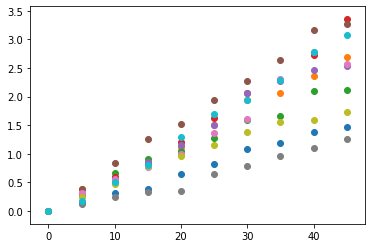

In [41]:
for i in drugs:
    met_drug_data = mean_mets_df2.loc[:, i]
    plt.scatter(time, met_drug_data)
#Save the Figure
plt.show()

In [53]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_counts = grouped_drug_data.count()
# Convert to DataFrame
mouse_counts_df = grouped_counts.drop(columns = ["Tumor Volume (mm3)", "Metastatic Sites"])
# Preview DataFrame
mouse_counts_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [54]:
# Minor Data Munging to Re-Format the Data Frames
mouse_counts_df2 = mouse_counts_df.pivot_table("Mouse ID", "Timepoint", "Drug")

# Preview the Data Frame
mouse_counts_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


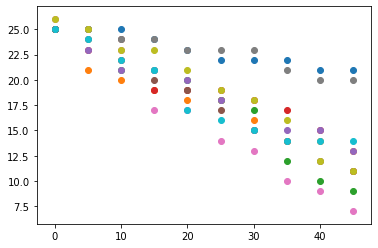

In [55]:
# Generate the Plot (Accounting for percentages)
for i in drugs:
    sr_drug_data = mouse_counts_df2.loc[:, i]
    plt.scatter(time, sr_drug_data)

# Save the Figure

# Show the Figure
plt.show()

In [ ]:
#SUMMARY BAR GRAPH
# Calculate the percent changes for each drug

# Display the data to confirm

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()